## Problem 36: The Lindblad Master Equation (Qubit Decay)

**Physics:**  
Perfectly isolated quantum systems are an idealization. In reality, qubits lose energy to their environment through processes such as spontaneous emission. This open-system dynamics is described by the **Lindblad master equation**:

$\dot{\rho} = -i[H, \rho] + \sum_i \mathcal{D}[C_i]\rho$

where the Lindblad dissipator is defined as

$\mathcal{D}[C]\rho = C\rho C^\dagger - \frac{1}{2}\{C^\dagger C, \rho\}$.

This formalism guarantees completely positive, trace-preserving evolution of the density matrix.

---

**System:** Single qubit.

---

**Tasks:**

1. **Initial State:**  
   Prepare the qubit in the excited state $|1\rangle$.

2. **Decay Channel:**  
   Define a collapse (decay) operator  
   $C = \sqrt{\gamma}\,\sigma_-$  
   with decay rate $\gamma = 0.1$.

3. **Time Evolution:**  
   Evolve the system for times  
   $t \in [0, 50]$  
   using `mesolve`.

4. **Measurement:**  
   Track the excited-state population  
   $P_1(t) = \langle |1\rangle\langle 1| \rangle$.

---

**Expected Physics Check:**

- The excited-state population decays **exponentially** in time.
- The decay rate is set by $\gamma$.
- In the long-time limit, the system relaxes to the ground state $|0\rangle$.
- This behavior illustrates **energy relaxation** (T₁ decay) of a qubit.

This model provides the simplest and most important example of open quantum system dynamics.


/home/iterium/quantum_env/lib/python3.12/site-packages/qutip/solver/solver_base.py:598: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


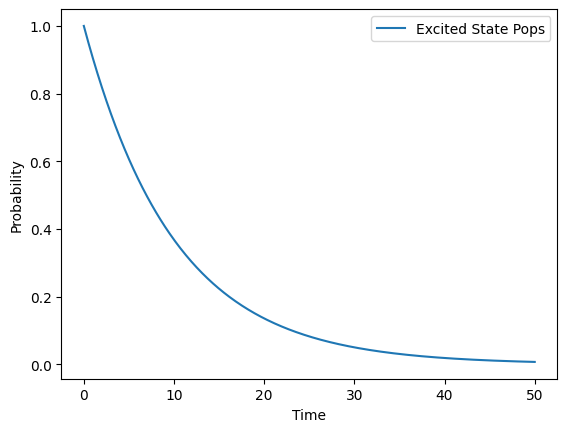

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

psi = basis(2,0)
gamma = 0.1
c_ops = [np.sqrt(gamma)*sigmam()]
H = 0*sigmaz()
e_ops = [psi*psi.dag()]
times = np.linspace(0,50,500)
results = mesolve(H,psi,times,c_ops,e_ops)
plt.plot(times,results.expect[0],label = "Excited State Pops")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.legend()
plt.show()

## Problem 37: Dephasing vs. Relaxation

**Physics:**  
In realistic quantum systems (such as superconducting qubits), decoherence arises from **multiple independent noise channels**.

- **Relaxation (T₁):**  
  Energy loss to the environment, described by the lowering operator $\sigma_-$.

- **Dephasing (T$_\phi$):**  
  Loss of phase coherence without energy exchange, described by $\sigma_z$.

While relaxation drives the system toward the ground state, dephasing destroys quantum superpositions by suppressing off-diagonal density-matrix elements.

---

**System:** Single qubit (open quantum system).

---

**Tasks:**

1. **Initial State:**  
   Prepare the superposition state  
   $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$.

2. **Collapse Operators:**  
   Define two independent decoherence channels:
   - Relaxation: $C_{\text{relax}} = \sqrt{0.05}\,\sigma_-$  
   - Dephasing: $C_{\text{deph}} = \sqrt{0.1}\,\sigma_z$

3. **Time Evolution:**  
   Evolve the system using the Lindblad master equation with both collapse operators active.

4. **Observables:**  
   Track:
   - $\langle \sigma_x \rangle$ — coherence of the superposition
   - Purity $\text{Tr}(\rho^2)$ — degree of mixedness of the quantum state

---

**Expected Physics Check:**

- $\langle \sigma_x \rangle$ decays due to **both** relaxation and dephasing.
- Pure dephasing suppresses coherence **without changing populations**.
- Relaxation drives the system toward the ground state.
- The purity decreases from 1 as the state becomes mixed.
- Dephasing alone preserves populations but reduces purity.

This problem clearly distinguishes **loss of energy** from **loss of phase coherence**, a central concept in open quantum systems.


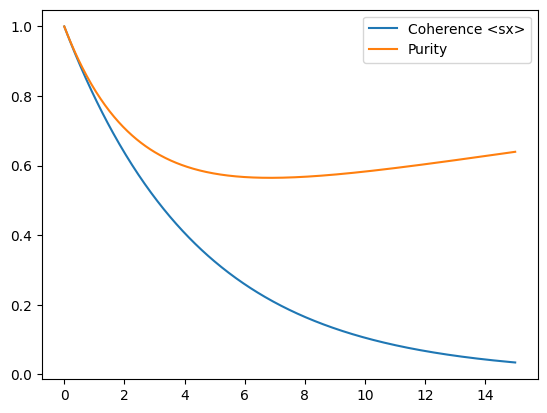

In [34]:
c_r = np.sqrt(0.05)*sigmam()
c_d = np.sqrt(0.1)*sigmaz()
psi = (basis(2,0)+basis(2,1)).unit()
c_ops = [c_r,c_d]
H = 0*sigmax()
times = np.linspace(0,15,500)
e_ops = [sigmax()]
rho = ket2dm(psi)
results = mesolve(H, psi, times,c_ops,e_ops)
purity = [(rho*rho).tr() for rho in mesolve(H, psi, times,c_ops,[]).states]
plt.plot(times, results.expect[0], label="Coherence <sx>")
plt.plot(times, purity, label="Purity")
plt.legend(); plt.show()

The coherence ⟨σx⟩ decays monotonically due to both relaxation and dephasing, reflecting the loss of phase coherence in the superposition state. The purity initially decreases as the state becomes mixed, but later increases as relaxation drives the system toward the ground state, which is pure. The presence of dephasing prevents full purification, resulting in a partial recovery of purity. This behavior highlights the competing roles of relaxation and dephasing in open quantum systems.


## Problem 38: Steady-State Parameter Sweep (Population Heatmap)

**Physics:**  
In driven–dissipative quantum systems, the steady state $\rho_{\text{ss}}$ results from a balance between coherent driving and environmental decay. The properties of this steady state depend sensitively on the drive strength, detuning, and dissipation rate. A two-parameter sweep allows us to visualize resonance conditions and saturation effects.

---

**System:** Single driven qubit (open quantum system).

---

**Model:**

- **Hamiltonian:**  
  $H = \Delta\,\sigma_z + \Omega\,\sigma_x$

- **Dissipation:**  
  Energy relaxation described by the collapse operator  
  $C = \sqrt{\gamma}\,\sigma_-$

- **Fixed Parameter:**  
  $\gamma = 1.0$

---

**Tasks:**

1. **Parameter Sweep:**  
   Sweep the detuning $\Delta \in [-2,\,2]$ and the drive strength $\Omega \in [0,\,2]$.

2. **Steady State:**  
   For each pair $(\Delta,\Omega)$, compute the steady-state density matrix $\rho_{\text{ss}}$ using the Lindblad master equation.

3. **Observable:**  
   Evaluate the excited-state population  
   $P_e = \langle e | \rho_{\text{ss}} | e \rangle$.

4. **Visualization:**  
   Plot $P_e(\Delta,\Omega)$ as a two-dimensional heatmap.

---

**Expected Physics Check:**

- Maximum population occurs near resonance ($\Delta \approx 0$).
- Increasing drive strength broadens the resonance (power broadening).
- At strong driving, the population saturates and does not reach unity due to dissipation.

This problem illustrates how steady-state spectroscopy emerges naturally in open quantum systems.


<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\O'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_11725/907060643.py:13: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("Detuning $\Deltas$")
/tmp/ipykernel_11725/907060643.py:14: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel("Drive $\Omega$")
/tmp/ipykernel_11725/907060643.py:13: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("Detuning $\Deltas$")
/tmp/ipykernel_11725/907060643.py:14: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel("Drive $\Omega$")


AttributeError: module 'matplotlib.pyplot' has no attribute 'colourbar'

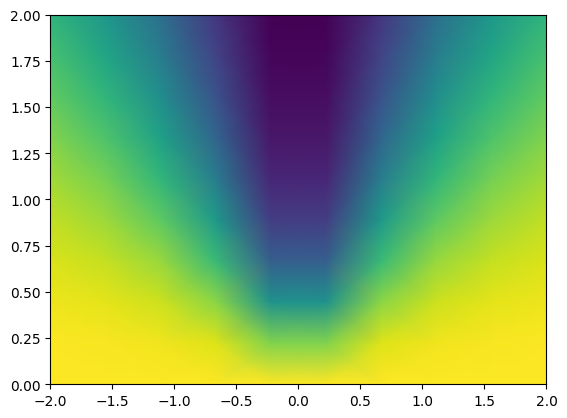

In [4]:
gamma = 1.0
delta_vec = np.linspace(-2,2,10)
omega_vec = np.linspace(0,2,10)
p_excited = np.zeros((len(omega_vec),len(delta_vec)))
c_ops = [np.sqrt(gamma)*sigmam()]
for i, omega in enumerate(omega_vec):
    for j, delta in enumerate(delta_vec):
        H = delta*sigmaz() + omega*sigmax()
        rho_ss = steadystate(H,c_ops)
        p_excited[i,j] = expect(num(2),rho_ss)
plt.pcolormesh(delta_vec,omega_vec,p_excited,shading = "gouraud",cmap = "viridis")
plt.colourbar(label = "Excited Population")
plt.xlabel("Detuning $\Deltas$")
plt.ylabel("Drive $\Omega$")
plt.show()


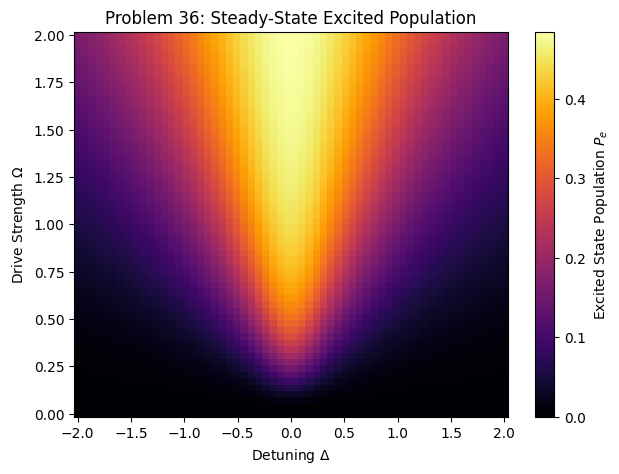

In [6]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# Fixed parameters
gamma = 1.0
c_ops = [np.sqrt(gamma) * sigmam()]

# Parameter sweeps
Delta_vals = np.linspace(-2, 2, 60)
Omega_vals = np.linspace(0, 2, 60)

Pe = np.zeros((len(Omega_vals), len(Delta_vals)))

# Excited-state projector (QuTiP convention!)
Pe_op = basis(2,0) * basis(2,0).dag()

# Sweep
for i, Omega in enumerate(Omega_vals):
    for j, Delta in enumerate(Delta_vals):
        H = Delta * sigmaz() + Omega * sigmax()
        rho_ss = steadystate(H, c_ops)
        Pe[i, j] = expect(Pe_op, rho_ss)

# Plot heatmap
plt.figure(figsize=(7,5))
plt.pcolormesh(Delta_vals, Omega_vals, Pe, shading="auto", cmap="inferno")
plt.colorbar(label="Excited State Population $P_e$")
plt.xlabel("Detuning $\\Delta$")
plt.ylabel("Drive Strength $\\Omega$")
plt.title("Problem 36: Steady-State Excited Population")
plt.show()
